In [368]:
import matplotlib.pyplot as plt
from matplotlib.figure import Figure as plt_Figure
from matplotlib.axes import Axes as plt_Axes
import skimage as ski
import numpy as np
from typing import cast, TypeVar, Any
import random
plt.ioff()

def rgb2gray(img: np.ndarray) -> np.ndarray[Any, np.uint8]:
    return np.uint8(np.round(ski.color.rgb2gray(img) * 255))

## Zadanie 1

a) Wczytaj obraz gears1.png, przekształć jego format do odcieni szarości [0:256]

In [351]:
img_gears = ski.io.imread("lab3/gears1.png")
img_gears = rgb2gray(img_gears)

Korzystając z gotowej funkcji try_all_threshold znajdź najlepszą metodę
automatyczną. Zanotuj dwie najlepsze metody

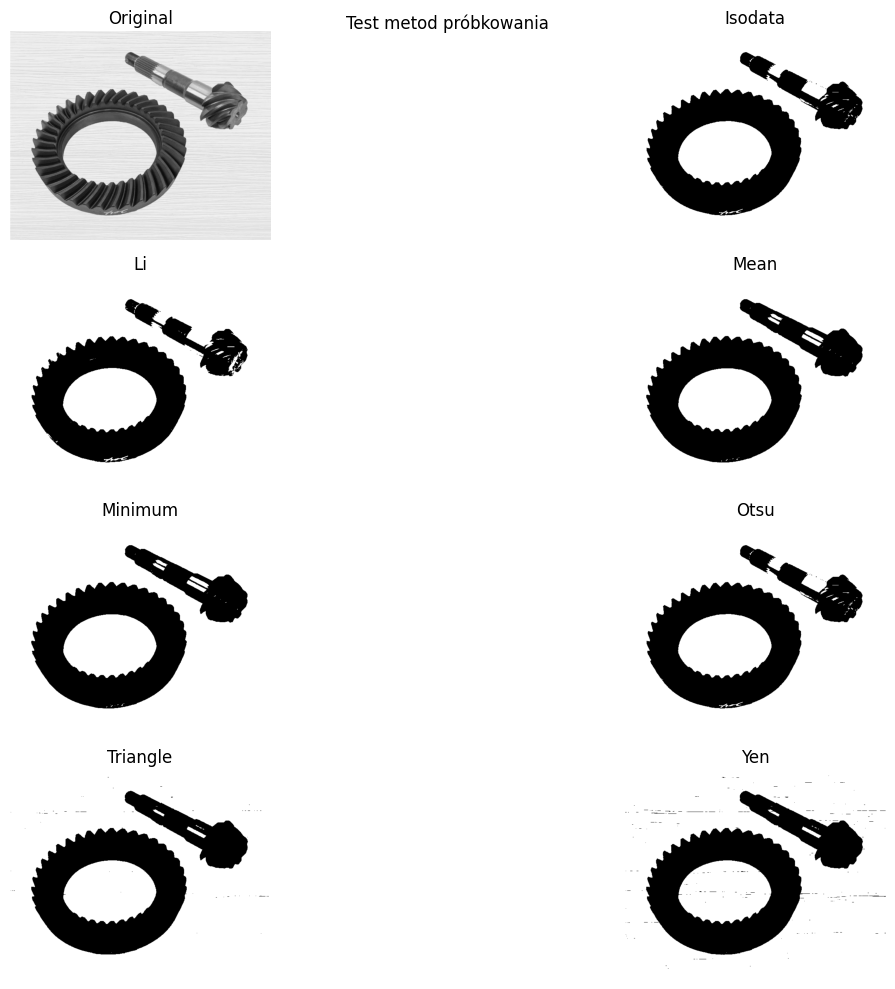

In [369]:
fig, axs = ski.filters.try_all_threshold(img_gears, figsize=(16,10), verbose=False)
fig.suptitle("Test metod próbkowania")
plt.show()

In [353]:
# Najlepszymi metodami zdają się być metody `Li` oraz `Otsu`

c) Dwie najlepsze metody zastosuj osobno

d) Obraz po zastosowaniu progowania dla obu metod wyświetl wraz z histogramem.
   Na histogramie zaznacz wartość progu.

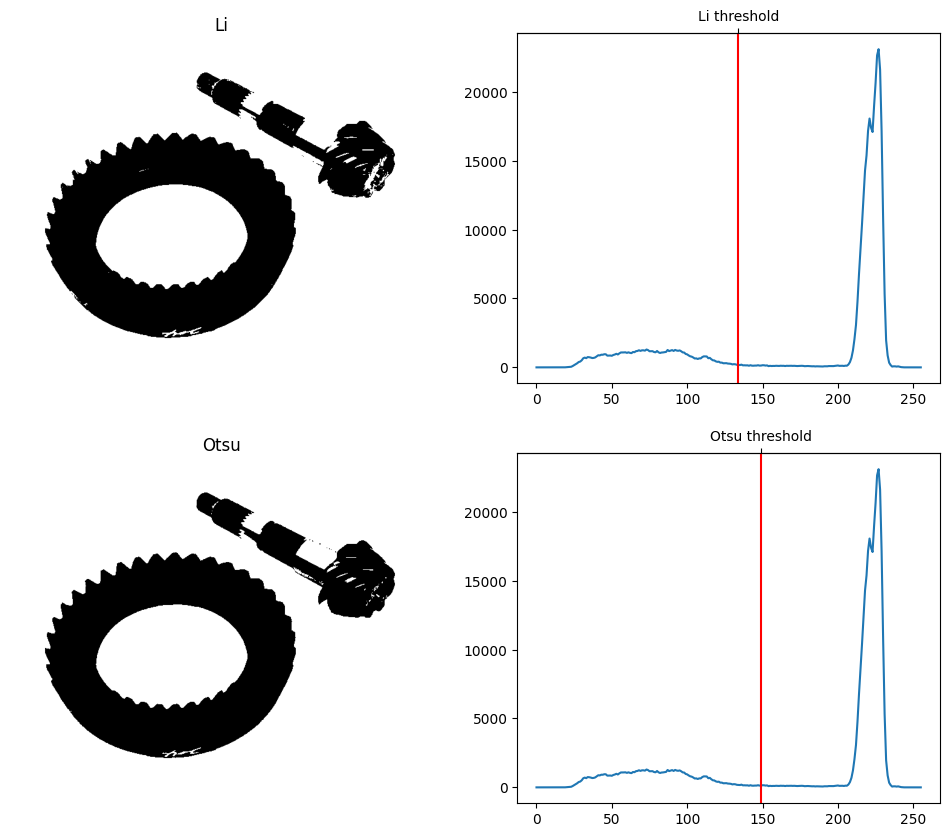

In [354]:
th_Li = ski.filters.threshold_li(img_gears)
th_Otsu = ski.filters.threshold_otsu(img_gears)

img_gears_Li = img_gears > th_Li
img_gears_Otsu = img_gears > th_Otsu

axs: np.ndarray[Any, plt_Axes]
_, axs = plt.subplots(2, 2, figsize=(12, 10))

hist, _ = np.histogram(img_gears, bins=256, range=(0, 255))

cast(plt_Axes, axs[0, 0]).imshow(img_gears_Li, cmap="gray")
cast(plt_Axes, axs[0, 0]).axis(False)
cast(plt_Axes, axs[0, 0]).set_title("Li")

cast(plt_Axes, axs[0, 1]).plot(hist)
cast(plt_Axes, axs[0, 1]).axvline(th_Li, color="r")
axs01 = cast(plt_Axes, axs[0, 1]).secondary_xaxis("top")
axs01.set_xticks(np.array([th_Li]), np.array(["Li threshold"]))

cast(plt_Axes, axs[1, 0]).imshow(img_gears_Otsu, cmap="gray")
cast(plt_Axes, axs[1, 0]).axis(False)
cast(plt_Axes, axs[1, 0]).set_title("Otsu")

cast(plt_Axes, axs[1, 1]).plot(hist)
cast(plt_Axes, axs[1, 1]).axvline(th_Otsu, color="r")
axs11 = cast(plt_Axes, axs[1, 1]).secondary_xaxis("top")
axs11.set_xticks(np.array([th_Otsu]), np.array(["Otsu threshold"]))

plt.show()

* implementacja własna Otsu threshold

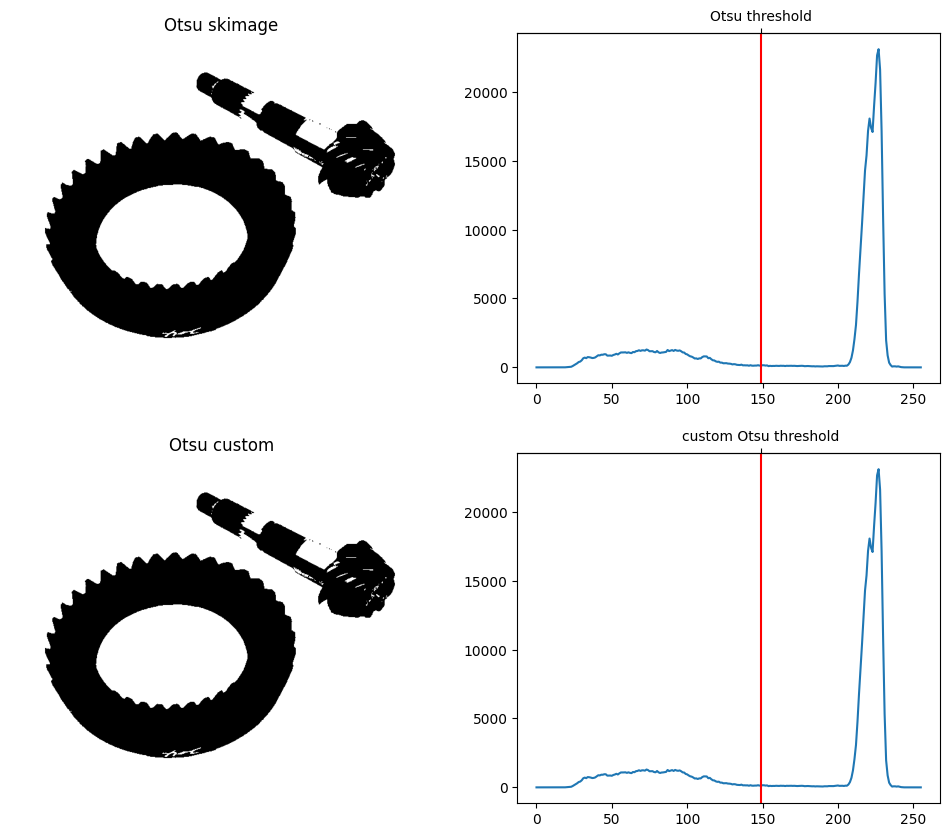

In [370]:
def my_otsu(img: np.ndarray) -> int:
    if img.ndim > 2:
        img = ski.color.rgb2gray(img) * 255

    hist, edges = np.histogram(img, bins=256, range=(0, 256))
    hist = hist / np.sum(hist)
    cum_sum = np.cumsum(hist)
    cum_sum[cum_sum < 1e-32] = 1e-32

    x = np.arange(256)
    cum_sum_x = np.cumsum(x * hist)
    m0 = cum_sum_x / cum_sum

    cum_dif = 1 - cum_sum
    cum_dif[cum_dif < 1e-32] = 1e-32
    m1 = (cum_sum_x[-1] - cum_sum_x) / cum_dif

    var = cum_sum * (1 - cum_sum) * (m0 - m1) ** 2
    thr = np.argmax(var)
    return int(thr)


axs: np.ndarray[Any, plt_Axes]
_, axs = plt.subplots(2, 2, figsize=(12, 10))

hist, _ = np.histogram(img_gears, bins=256, range=(0, 255))

cast(plt_Axes, axs[0, 0]).imshow(img_gears_Otsu, cmap="gray")
cast(plt_Axes, axs[0, 0]).axis(False)
cast(plt_Axes, axs[0, 0]).set_title("Otsu skimage")

cast(plt_Axes, axs[0, 1]).plot(hist)
cast(plt_Axes, axs[0, 1]).axvline(th_Otsu, color="r")
axs01 = cast(plt_Axes, axs[0, 1]).secondary_xaxis("top")
axs01.set_xticks(np.array([th_Otsu]), np.array(["Otsu threshold"]))

th_myOtsu = my_otsu(img_gears)
img_gears_myOtsu = img_gears > th_myOtsu

cast(plt_Axes, axs[1, 0]).imshow(img_gears_myOtsu, cmap="gray")
cast(plt_Axes, axs[1, 0]).axis(False)
cast(plt_Axes, axs[1, 0]).set_title("Otsu custom")

cast(plt_Axes, axs[1, 1]).plot(hist)
cast(plt_Axes, axs[1, 1]).axvline(th_myOtsu, color="r")
axs11 = cast(plt_Axes, axs[1, 1]).secondary_xaxis("top")
axs11.set_xticks(np.array([th_Otsu]), np.array(["custom Otsu threshold"]))

plt.show()

# Zadanie 2

Wczytaj do pamięci obraz printed_page.png.

Celem jest wydzielenie tekstu od tła, aby przeprowadzić proces OCR.

Metodą try_all_threshold spróbuj którejś z gotowych metod progowania, spróbuj
również dobrać ręcznie wartość progu. Efekt może nie być zadowalający.

Korzystając z tego filtru (dobierając odpowiednio wielkość dysku) spróbuj
uzyskać obraz, który nazwiesz tlo.

Od tego obrazu odejmij obraz oryginalny
```python
obraz2 = tlo - obraz
```

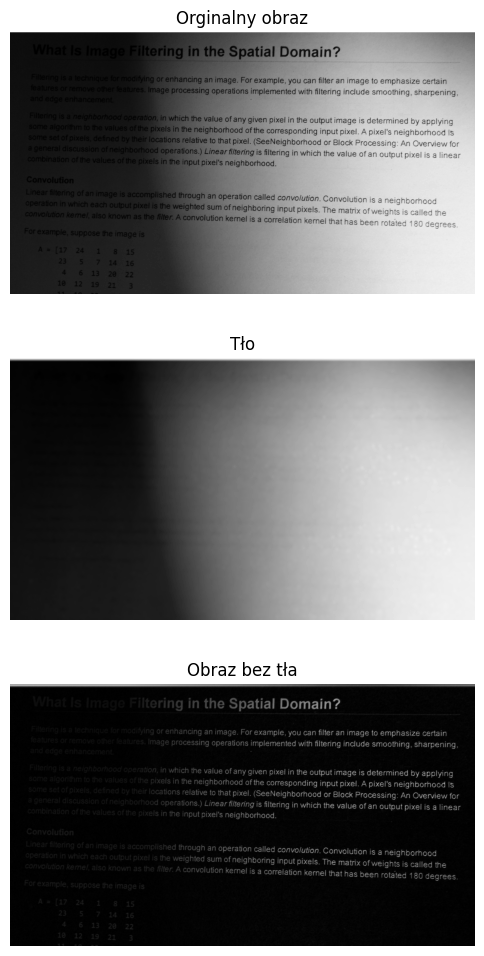

In [356]:
img_print = ski.io.imread("lab3/printed_text.png")
img_print = rgb2gray(img_print)

background = ski.filters.rank.maximum(img_print, ski.morphology.disk(6))
background = ski.filters.rank.mean(background, ski.morphology.disk(6))

img_print_no_bg = background - img_print

img_print_no_bg[img_print_no_bg < 0] = 0

_, axs = plt.subplots(3, 1, figsize=(6, 12))

cast(plt_Axes, axs[0]).imshow(img_print, cmap="gray")
cast(plt_Axes, axs[0]).axis(False)
cast(plt_Axes, axs[0]).set_title("Orginalny obraz")

cast(plt_Axes, axs[1]).imshow(background, cmap="gray")
cast(plt_Axes, axs[1]).axis(False)
cast(plt_Axes, axs[1]).set_title("Tło")

cast(plt_Axes, axs[2]).imshow(img_print_no_bg, cmap="gray")
cast(plt_Axes, axs[2]).axis(False)
cast(plt_Axes, axs[2]).set_title("Obraz bez tła")

plt.show()

Dla otrzymanego obrazu ponownie wykonaj try_all_threshold i określ najlepszą
metodę.

Wybraną metodę zastosuj (pojedynczo) i zapisz uzyskany obraz na dysku (będzie 
widać więcej szczegółów niż na figurze. Jeśli efekt nie jest idealny, przed 
wykonaniem odejmowania przefiltruj tlo filtrem rank.mean. Właściwy efekt 
powinien być następujący

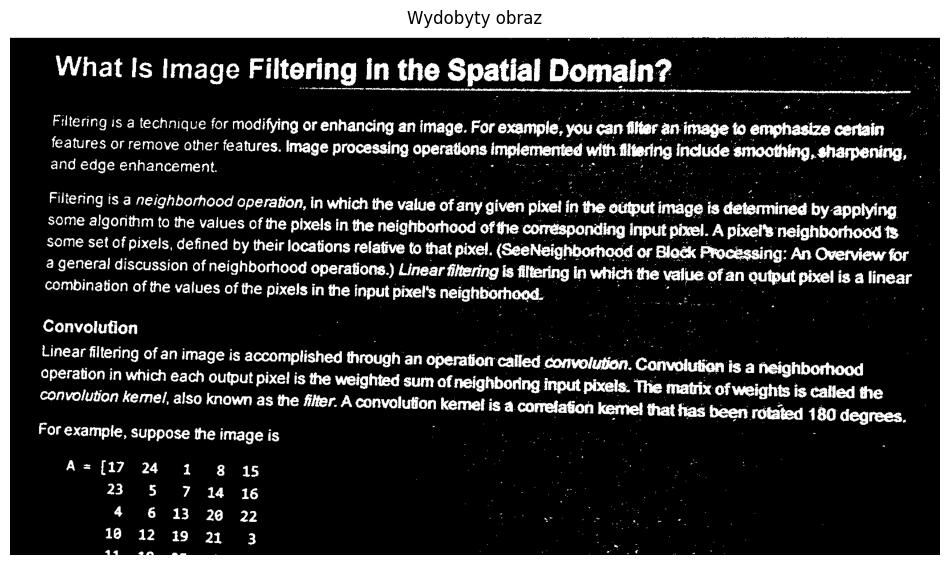

In [357]:
# Najlepszy efekt daje metoda mean #
# _, axs = ski.filters.try_all_threshold(img_print_no_bg, figsize=(16, 10), verbose=False)

th = ski.filters.threshold_mean(img_print_no_bg)

img_print_th = img_print_no_bg > th

ax: plt_Axes
_, ax = plt.subplots(figsize=(12, 10))

cast(plt_Axes, ax).imshow(img_print_th, cmap="gray")
cast(plt_Axes, ax).axis(False)
cast(plt_Axes, ax).set_title("Wydobyty obraz")

plt.show()

# Zadanie 3

Na obrazie mikroskopowym rozmazu krwi ludzkiej możemy zaobserwować różne komórki

Wczytaj obraz blood_smear.jpg i przekształć go do odcieni szarości. 

In [358]:
img_smear_og = ski.io.imread("lab3/blood_smear.jpg")
img_smear = rgb2gray(img_smear_og)

Następnie  poprzez ręczny dobór wartości progu t1 uzyskaj obraz1 zawierający 
wszystkie krwinki

In [359]:
axs: np.ndarray[Any, plt_Axes]
# _, axs = plt.subplots(4, 2, figsize=(12, 10))
# vs = np.linspace(54, 154, 8, dtype=np.uint8)
# aaa = axs.reshape((8, ))

# for i, v in enumerate(vs):
#     cast(plt_Axes, aaa[i]).imshow(img_smear > v, cmap="gray")
#     cast(plt_Axes, aaa[i]).axis(False)
#     cast(plt_Axes, aaa[i]).set_title(f"Threshold: {v}")

# plt.show()

t1 = 228
i1 = (img_smear < t1) * 255

Poprzez ręczny wybór wartości progu t2 uzyskaj obraz2 zawierający inne krwinki

In [360]:
t2 = 111
i2 = (img_smear < t2) * 255

Mając dobrane wartości t1 i t2 utwórz obraz barwny, jak poniżej

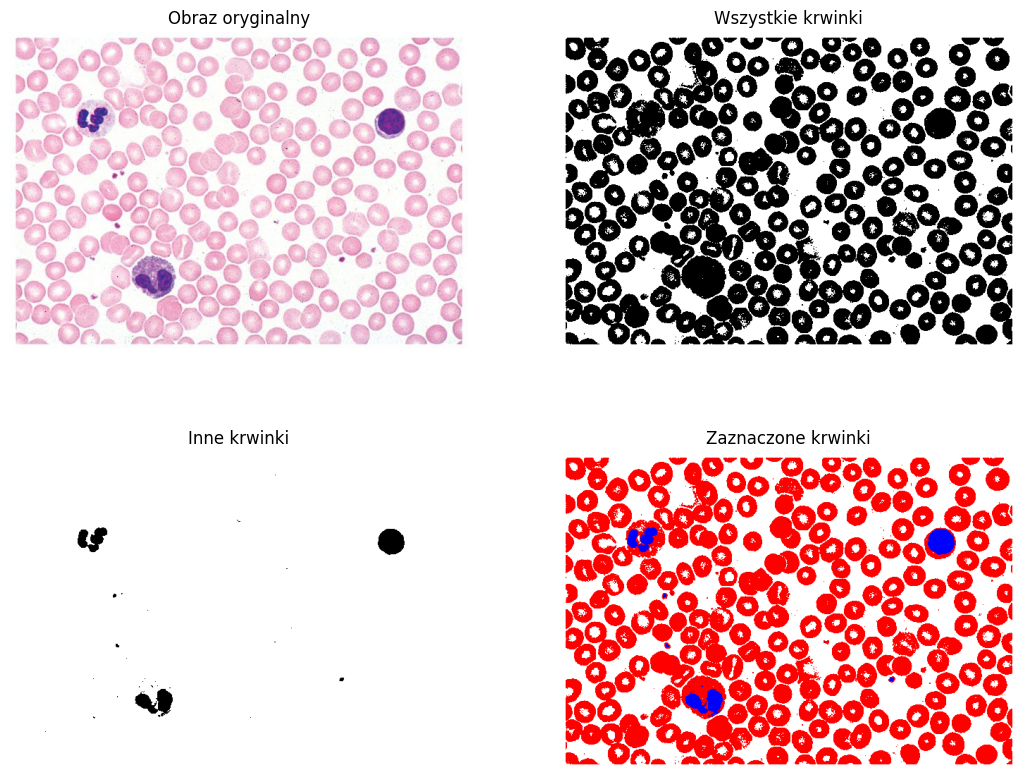

In [361]:
_r = np.full(img_smear.shape, 255) - i2
_g = np.full(img_smear.shape, 255) - i1
_b = np.full(img_smear.shape, 255) - i1 + i2

img_smear_col = np.stack([_r, _g, _b], axis=2)

_, axs = plt.subplots(2, 2, figsize=(13, 10))

cast(plt_Axes, axs[0, 0]).imshow(img_smear_og)
cast(plt_Axes, axs[0, 0]).axis(False)
cast(plt_Axes, axs[0, 0]).set_title("Obraz oryginalny")

cast(plt_Axes, axs[0, 1]).imshow(255 - i1, cmap="gray")
cast(plt_Axes, axs[0, 1]).axis(False)
cast(plt_Axes, axs[0, 1]).set_title("Wszystkie krwinki")

cast(plt_Axes, axs[1, 0]).imshow(255 - i2, cmap="gray")
cast(plt_Axes, axs[1, 0]).axis(False)
cast(plt_Axes, axs[1, 0]).set_title("Inne krwinki")

cast(plt_Axes, axs[1, 1]).imshow(img_smear)
cast(plt_Axes, axs[1, 1]).axis(False)
cast(plt_Axes, axs[1, 1]).set_title("Zaznaczone krwinki")

plt.imshow(img_smear_col)
plt.show()

# Zadanie 4

a) Korzystając z metody progowania spróbuj uzyskać obraz samolotu airbus.png.
Zaprezentuj najlepszy wynik, który udało się uzyskać. Mimo wszystko nie będzie
on zbyt dobry.

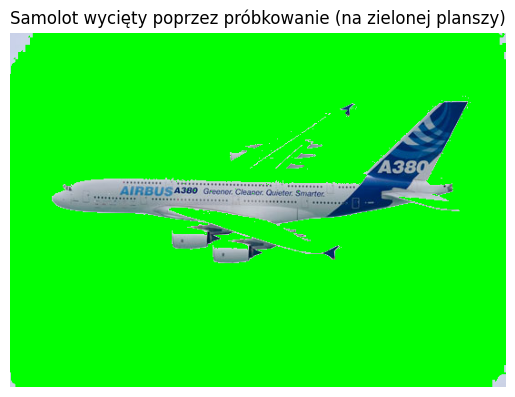

In [371]:
img_plane_og = ski.io.imread("lab3/airbus.png")
img_plane = rgb2gray(img_plane_og)

# _, axs = ski.filters.try_all_threshold(img_plane, figsize=(16, 10), verbose=False)

th_mean = ski.filters.threshold_mean(img_plane)
mask = img_plane > th_mean

img_plane_cut = img_plane_og.copy()
img_plane_cut[mask, :] = 0
img_plane_cut[mask, 1] = 255

plt.imshow(img_plane_cut, cmap="gray")
plt.axis(False)
plt.title("Samolot wycięty poprzez próbkowanie (na zielonej planszy)")
plt.show()

In [363]:
# Dla ułatwienia, wycięty samolot został umieszczony na zielonym tle

b) Wykonaj progowanie przestrzeni barw następująco:
- Wczytaj obraz samolotu, nie przekształcaj go na odcienie szarości.
- Z obrazu wydziel podobraz zawierający tyle dolnych linii żeby nie zawierał on
  kształtu samolotu i nazwij go np. niebo.

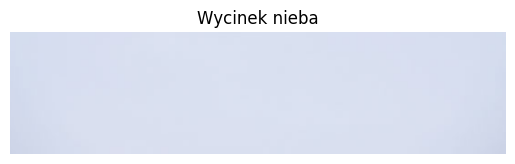

In [372]:
img_sky = img_plane_og[256:, :, :]

plt.imshow(img_sky)
plt.axis(False)
plt.title("Wycinek nieba")
plt.show()

- Dla obrazu niebo oblicz średnie wartości R,G,B. Skorzystaj z np.average

In [365]:
color_sky = np.uint8(np.floor(np.mean(img_sky, axis=(0, 1))))

# flat_sky = np.stack([
#     np.full(img_plane.shape, color_sky[0]),
#     np.full(img_plane.shape, color_sky[1]),
#     np.full(img_plane.shape, color_sky[2]),
# ], axis=2)

# plt.imshow(flat_sky)
# plt.axis(False)
# plt.show()

W pętli po wszystkich wierszach i kolumnach obrazu niebo porównaj uzyskaną 
wartość średnią z wartością dla każdego piksela, traktując kolor jako wektor 
o współrzędnych (R, G, B). Wykorzystaj np.linalg.norm do obliczenia odległości
pomiędzy wektorami. Zapamiętaj maksymalną różnicę jako liczbę maxDist.

In [366]:
sky_diff = np.abs(np.int16(img_sky) - color_sky)
maxDist = sky_diff.max(axis=(0,1))

- W pętli po wszystkich wierszach i kolumnach obrazu airbus porównaj każdy
  piksel obrazu z wartością średnią ponownie korzystając z normy. Jeśli będzie
  ona większa niż maxDist to oznacz piksel jako obiekt (1), w przeciwnym wypadku
  jako tło (0). Można uzyskać następujący efekt

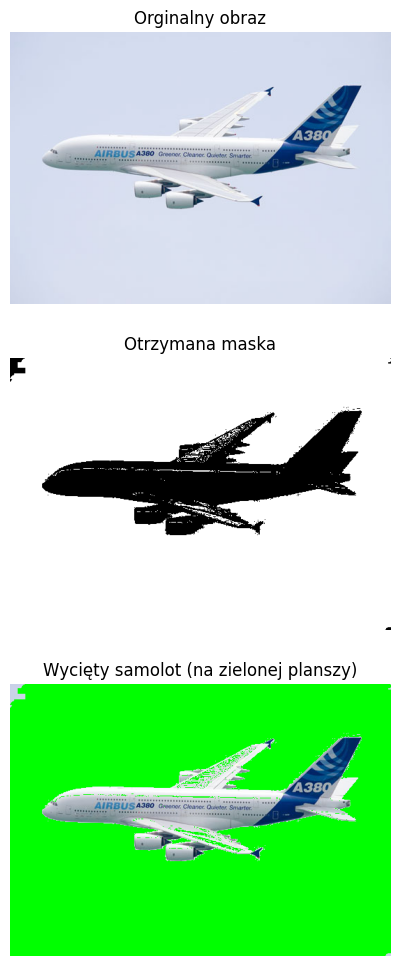

In [367]:
img_plane_masks = np.abs(np.int16(img_plane_og) - color_sky) < maxDist
img_plane_mask = np.logical_and(
    np.logical_and(
        img_plane_masks[:, :, 0],
        img_plane_masks[:, :, 1],
    ),
    img_plane_masks[:, :, 2],
)

_, axs = plt.subplots(3, 1, figsize=(6, 12))

cast(plt_Axes, axs[0]).imshow(img_plane_og)
cast(plt_Axes, axs[0]).axis(False)
cast(plt_Axes, axs[0]).set_title("Orginalny obraz")

cast(plt_Axes, axs[1]).imshow(img_plane_mask, cmap="gray")
cast(plt_Axes, axs[1]).axis(False)
cast(plt_Axes, axs[1]).set_title("Otrzymana maska")

img_plane_cut = img_plane_og.copy()
img_plane_cut[img_plane_mask, :] = 0
img_plane_cut[img_plane_mask, 1] = 255

cast(plt_Axes, axs[2]).imshow(img_plane_cut, cmap="gray")
cast(plt_Axes, axs[2]).axis(False)
cast(plt_Axes, axs[2]).set_title("Wycięty samolot (na zielonej planszy)")

plt.show()